In [86]:
import numpy as np
import pandas as pd

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
import tensorflow as tf

In [38]:
df1 = pd.read_csv('1.csv', encoding='euc-kr')
df2 = pd.read_csv('2.csv', encoding='euc-kr')
df3 = pd.read_csv('3.csv', encoding='euc-kr')
df4 = pd.read_csv('4.csv', encoding='euc-kr')
df5 = pd.read_csv('5.csv', encoding='euc-kr')
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df.head()

,일시,구분,미세먼지(PM10),초미세먼지(PM25),초미세먼지(PM2.5)
0,2011-12-31 23:00,평균,89.0,61.0,NaN
1,2011-12-31 23:00,강남구,91.0,58.0,NaN
2,2011-12-31 23:00,강동구,89.0,59.0,NaN
3,2011-12-31 23:00,강북구,68.0,49.0,NaN
4,2011-12-31 23:00,강서구,79.0,69.0,NaN


In [52]:
gangnam = df[df['구분'] == '강남구']
gangnam

,일시,구분,미세먼지(PM10),초미세먼지(PM25),초미세먼지(PM2.5)
1,2011-12-31 23:00,강남구,91.0,58.0,NaN
27,2011-12-31 22:00,강남구,102.0,56.0,NaN
53,2011-12-31 21:00,강남구,101.0,64.0,NaN
79,2011-12-31 20:00,강남구,95.0,66.0,NaN
105,2011-12-31 19:00,강남구,97.0,70.0,NaN
...,...,...,...,...,...
3405184,2022-01-01 4:00,강남구,18.0,NaN,7.0
3405210,2022-01-01 3:00,강남구,18.0,NaN,7.0
3405236,2022-01-01 2:00,강남구,18.0,NaN,8.0
3405262,2022-01-01 1:00,강남구,20.0,NaN,9.0


In [ ]:
#단순 선형회귀로 먼저 테스트 해보기
#학습 데이터셋, 결과 데이터셋 만들기
#학습용(현재 PM10), 결과(1시간 후 PM10)
X = gangnam[['미세먼지(PM10)']].copy()
y = gangnam[['일시']].copy()

In [65]:
#(현재 PM10), (1시간 후 PM10) 두 가지로 단순 선형회귀(모델 자체 정규화 이용)
#이후 점수 확인. -> 결과 개판
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_imputed, test_size=0.2, random_state=5)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

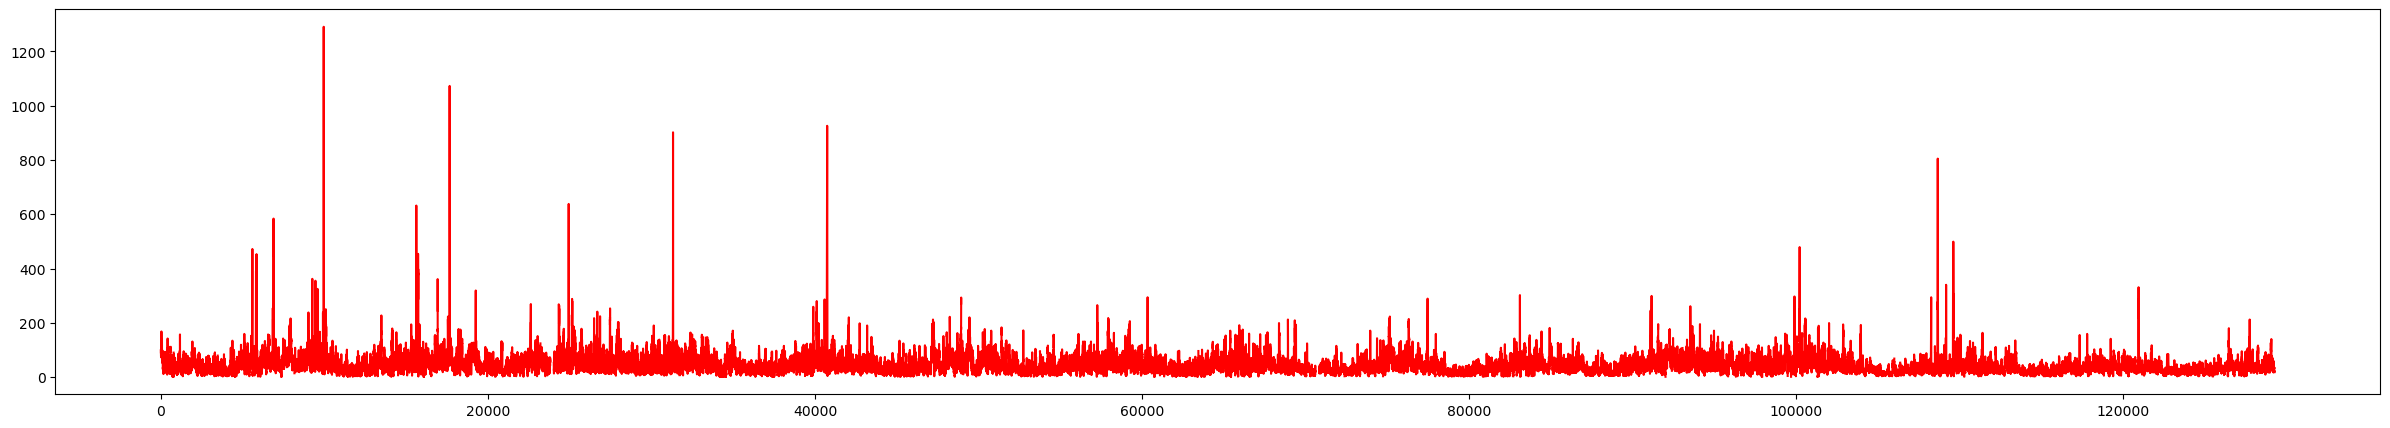

In [66]:
plt.figure(figsize=(30, 5))
plt.plot(gangnam[['미세먼지(PM10)']].reset_index().index, gangnam[['미세먼지(PM10)']].reset_index()['미세먼지(PM10)'], color='red')
#plt.plot(X.reset_index().index, model.predict(X), color='blue',)

plt.show()

In [ ]:
#어떻게 회귀가 되었는지 그래프를 그려보았다.
#->아웃라이어 제거의 필요성을 느꼈다
plt.figure(figsize=(7, 7))
plt.grid(True)
plt.scatter(gangnam['미세먼지(PM10)'], gangnam['일시'],  color='black')
plt.plot(X_test, model.predict(X_test), color='blue', linewidth=3)

plt.show()